In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
sns.set_style("white", rc={'figure.figsize':(18.7,9.27)})

cats = [
    'Biking',
    'Beach',
    'Gibraltar Rock',
    'Hike (mountains)',
    'Village watching',
    'Escape Room',
    'Paddle',
    'Wine Tasting'
]
pal = sns.cubehelix_palette(8, rot=-.35, light=.7)
#pal = sns.diverging_palette(220, 20, n=8)
#pal = sns.color_palette("cubehelix", 8)
#pal = 'GnBu_d'
#pal = sns.cubehelix_palette(4)

In [43]:
df = pd.read_csv('data/adventure_votes.csv', header=None)
df.index = cats
df = df.transpose()
df.head()

,Biking,Beach,Gibraltar Rock,Hike (mountains),Village watching,Escape Room,Paddle,Wine Tasting
0,7,3,4,1,5,8,2,6
1,8,4,2,1,6,5,7,3
2,4,8,3,1,5,7,2,6
3,7,1,5,2,5,4,3,8
4,7,8,5,1,6,4,2,3


In [44]:
m  = pd.melt(df, value_vars=cats)
m.head()

,variable,value
0,Biking,7
1,Biking,8
2,Biking,4
3,Biking,7
4,Biking,7


In [45]:
m.groupby('variable')['value'].mean().to_frame().sort_values('value')

,value
variable,
Hike (mountains),2.352941
Gibraltar Rock,3.588235
Paddle,3.764706
Beach,4.294118
Wine Tasting,4.411765
Village watching,5.823529
Biking,5.882353
Escape Room,5.882353


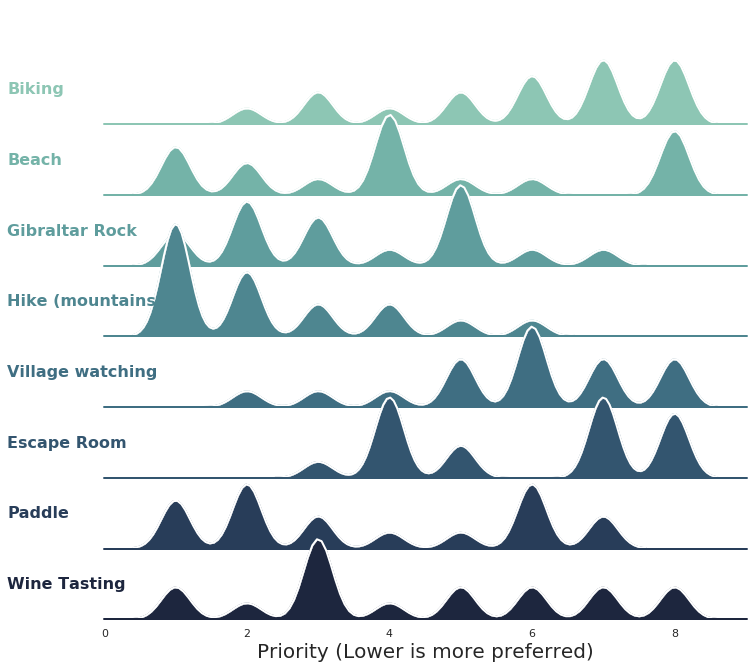

In [46]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'figure.figsize':(18.7,9.27)})

# Initialize the FacetGrid object
g = sns.FacetGrid(m, row="variable", hue="variable", aspect=9, height=1.2, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "value", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.15, .3, label, fontweight='bold', fontsize=16, color=color,
            ha="left", va="center", transform=ax.transAxes, zorder=5)
    
g.map(label, "value")
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.40)
g.set_titles("")
g.set(yticks=[])
plt.gca().set_xlabel("Priority (Lower is more preferred)",fontsize=20)
g.despine(bottom=True, left=True)

g.fig.savefig('vote_dist_row.svg', format='svg')

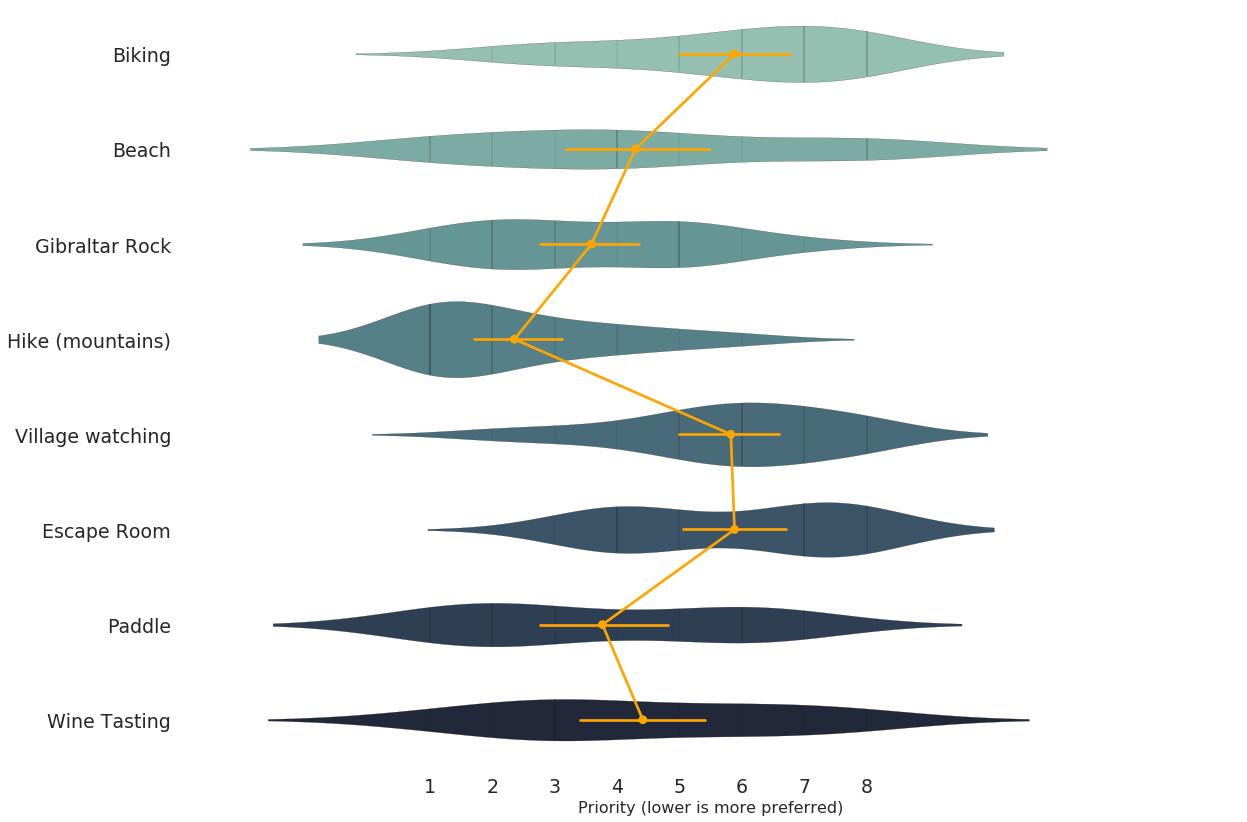

In [199]:
plt.figure(figsize=(19, 14))
ax = sns.violinplot(x='value', y='variable', orient='h', data=m, palette=pal, inner='stick', linewidth=0.2, cut=2)
sns.pointplot(x='value', y='variable', orient='h', color='orange', data=m, ax=ax)
sns.despine(bottom=True, left=True)

#ax.axes.set_title("Vote Distribution",fontsize=30)
ax.set_ylabel("",fontsize=20)
ax.set_xlabel("Priority (lower is more preferred)",fontsize=16)
ax.tick_params(labelsize=19)
fig = ax.get_figure()
xticks = range(0,11)
ax.set_xlim(-3, 14)

plt.xticks(xticks, ["" if x in [-1, 0, 9, 10] else x for x in xticks])
fig.savefig('vote_dist_violin.png', format='png')

In [48]:
df

,Biking,Beach,Gibraltar Rock,Hike (mountains),Village watching,Escape Room,Paddle,Wine Tasting
0,7,3,4,1,5,8,2,6
1,8,4,2,1,6,5,7,3
2,4,8,3,1,5,7,2,6
3,7,1,5,2,5,4,3,8
4,7,8,5,1,6,4,2,3
5,2,5,3,4,6,8,1,7
6,6,1,7,5,8,3,2,4
7,7,4,2,3,8,5,6,1
8,5,8,3,2,7,4,6,1
9,8,2,6,3,6,4,1,7


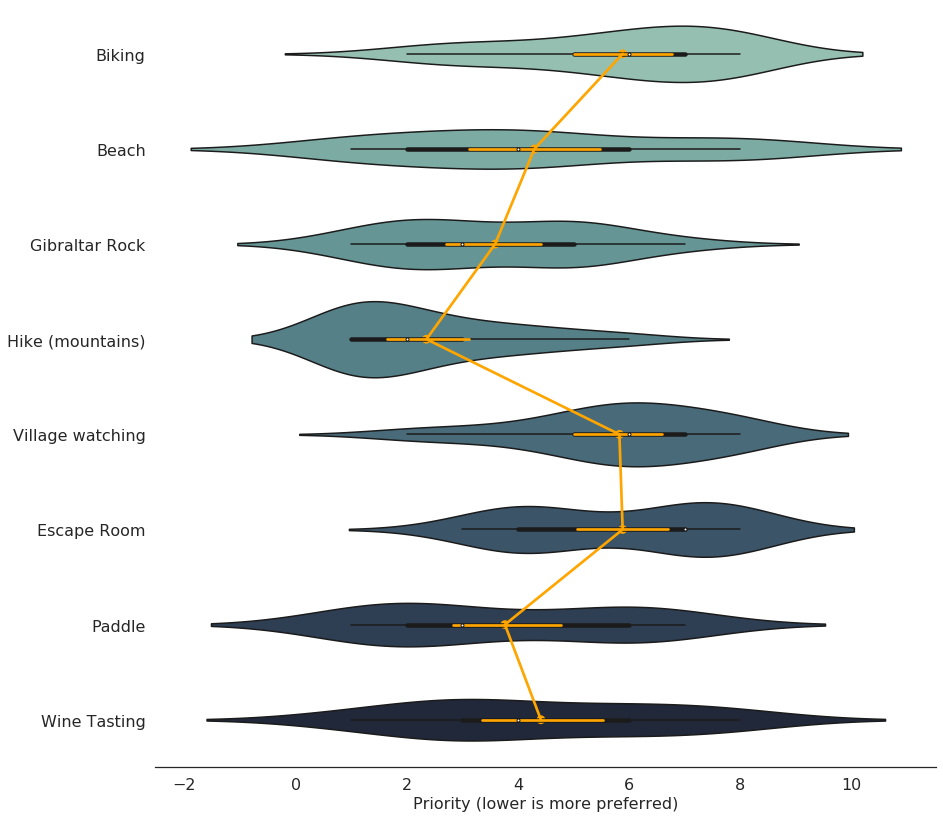

In [49]:
ax.get_figure()

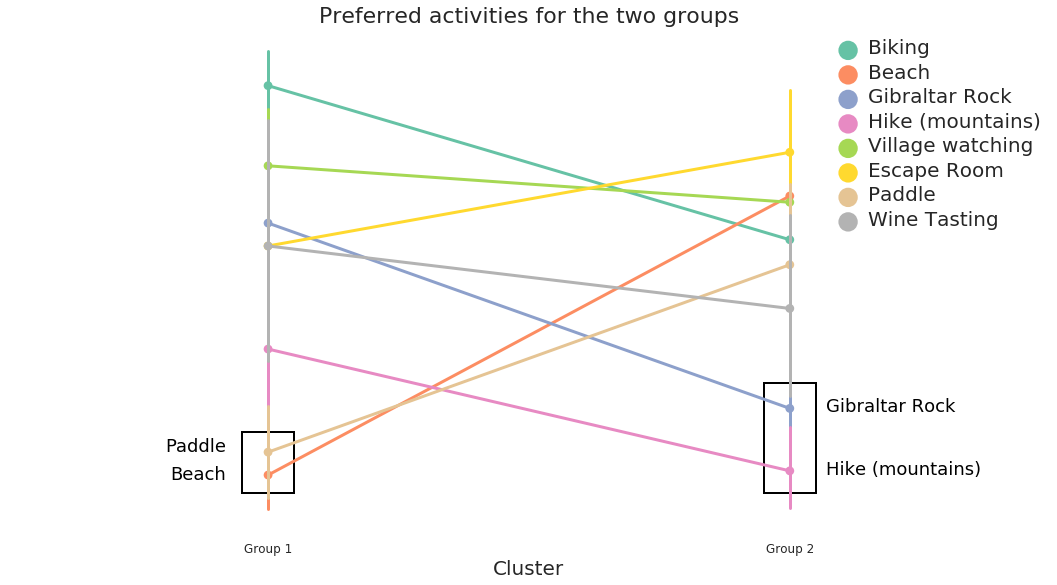

In [31]:
sns.set()
sns.set_style("white")
kmeans = KMeans(n_clusters=2, random_state=41)
pred = kmeans.fit_predict(df)
df['pred'] = pred

p = pd.melt(df, id_vars=['pred'], value_vars=cats)
ax = sns.pointplot(x='pred', y='value', hue='variable', data=p, palette="Set2")

leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

sns.despine()

plt.xticks([0, 1], ["Group 1", "Group 2"])
ax.axes.set_title("Preferred activities for the two groups",fontsize=22)
ax.set_xlabel("Cluster",fontsize=20)
ax.set_ylabel("Priority (lower is more preferred)",fontsize=20)
ax.tick_params(labelsize=12)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title

#change the marker size manually for both lines
for handle in ax.get_legend().legendHandles:
    handle.set_sizes([300.0])

plt.setp(ax.lines,linewidth=3)  # set lw for all lines of g axes
plt.setp(ax.lines,linewidth=3)  # set lw for all lines of g axes

import matplotlib.patches as patches
rect  = patches.Rectangle((-0.05,1.4),0.1,0.9,linewidth=2,edgecolor='black',facecolor='none')
rect2 = patches.Rectangle((0.95,1.4),0.1, 1.6,linewidth=2,edgecolor='black',facecolor='none')

from pylab import text
text(0.21, 0.17,'Paddle', ha='right', va='center', fontsize=18, color='black', transform=ax.transAxes)
text(0.21, 0.115,'Beach', ha='right', va='center', fontsize=18, color='black', transform=ax.transAxes)

text(0.785, 0.25,'Gibraltar Rock', ha='left', va='center', fontsize=18, color='black', transform=ax.transAxes)
text(0.785, 0.125,'Hike (mountains)', ha='left', va='center', fontsize=18, color='black', transform=ax.transAxes)

sns.despine(left=True, bottom=True)
ax.axes.get_yaxis().set_visible(False)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect2)
#sns.despine(left=True)
fig = ax.get_figure()
fig.savefig('cluster_res.png', format='png')

In [10]:
df

,Biking,Beach,Gibraltar Rock,Hike (mountains),Village watching,Escape Room,Paddle,Wine Tasting,pred
0,7,3,4,1,5,8,2,6,0
1,8,4,2,1,6,5,7,3,1
2,4,8,3,1,5,7,2,6,1
3,7,1,5,2,5,4,3,8,0
4,7,8,5,1,6,4,2,3,1
5,2,5,3,4,6,8,1,7,1
6,6,1,7,5,8,3,2,4,0
7,7,4,2,3,8,5,6,1,1
8,5,8,3,2,7,4,6,1,1
9,8,2,6,3,6,4,1,7,0


In [11]:
from sklearn.decomposition import PCA

df2 = df.drop('pred', axis=1)

pca = PCA(n_components=2).fit(df2)
pcad = pd.DataFrame(pca.transform(df2))
pcad['pred'] = ['Group 1' if x == 0 else 'Group 2' for x in pred]

In [12]:
pcad

,0,1,pred
0,0.839032,2.446084,Group 1
1,-1.163269,-3.019221,Group 2
2,-3.210855,2.332694,Group 2
3,3.537264,3.191988,Group 1
4,-0.308331,-1.576639,Group 2
5,-0.960318,4.014231,Group 2
6,6.119971,-0.515680,Group 1
7,-0.159945,-4.871119,Group 2
8,-2.957280,-4.370960,Group 2
9,4.992175,2.262221,Group 1


In [13]:
centers = kmeans.cluster_centers_
x = pca.transform(centers)
x

array([[ 4.12818417,  0.72656819],
       [-2.25173682, -0.39630992]])

In [14]:
sns.set()
sns.set_style("white", rc={'figure.figsize':(18.7,9.27)})

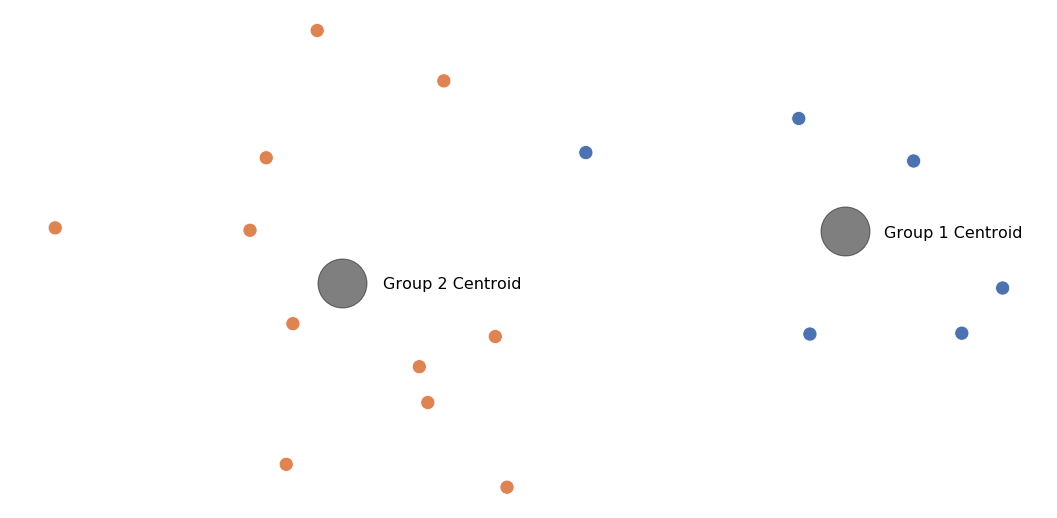

In [15]:
ax = sns.scatterplot(x=0, y=1, hue='pred', data=pcad, s=200)
plt.scatter(x[:, 0], x[:, 1], c='black', s=2400, alpha=0.5);
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='0') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title
ax.get_legend().remove()
text(0.36, 0.45,'Group 2 Centroid', ha='left', va='center', fontsize=16, color='black', transform=ax.transAxes)
text(0.84, 0.55,'Group 1 Centroid', ha='left', va='center', fontsize=16, color='black', transform=ax.transAxes)
sns.despine(left=True, bottom=True)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.get_figure().savefig('cluster_plt.svg', format='svg')